In [1]:
import pandas as pd

In [43]:
dados = pd.read_csv("diabetes.csv")

In [68]:
dados.rename(columns={'Pregnancies': 'gestacoes', 'Glucose': 'glicose', 'BloodPressure': 'pressao_arterial'}, inplace=True)
dados.rename(columns={'SkinThickness': 'espessura_pele', 'Insulin': 'insulina', 'BMI': 'imc'}, inplace=True)
dados.rename(columns={'DiabetesPedigreeFunction': 'predisposicao_genetica_diabetes', 'Age': 'idade', 'Outcome': 'diabetes'}, inplace=True)

In [125]:
dados.head()

,gestacoes,glicose,pressao_arterial,espessura_pele,insulina,imc,predisposicao_genetica_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dados.describe()

,gestacoes,glicose,pressao_arterial,espessura_pele,insulina,imc,predisposicao_genetica_diabetes,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
dados.shape

(768, 9)

In [58]:
import missingno as msno

<Axes: >

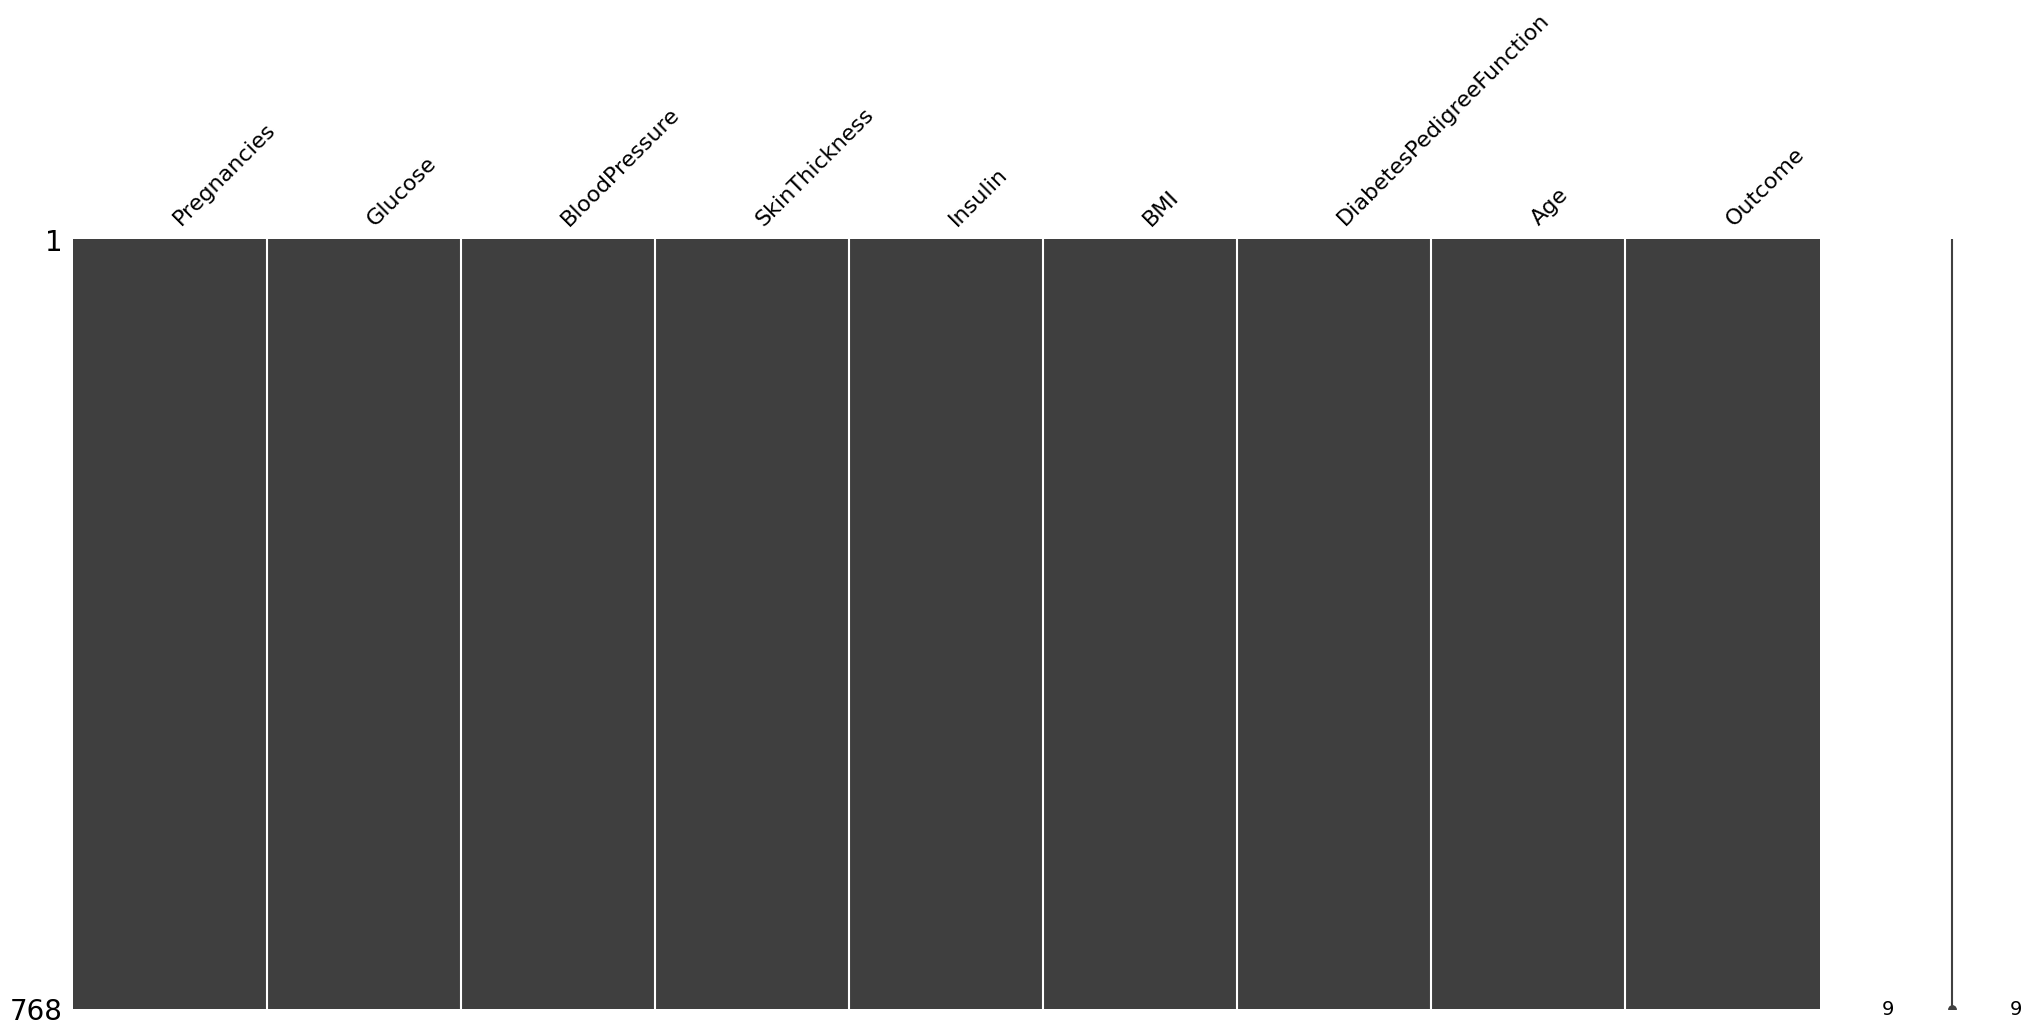

In [59]:
msno.matrix(dados)

In [13]:
dados.groupby("diabetes")[['glicose', 'pressao_arterial', 'espessura_pele', 'insulina', 'imc', 'idade']].mean()

,glicose,pressao_arterial,espessura_pele,insulina,imc,idade
diabetes,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,37.067164


In [129]:
dados['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='glicose', ylabel='insulina'>

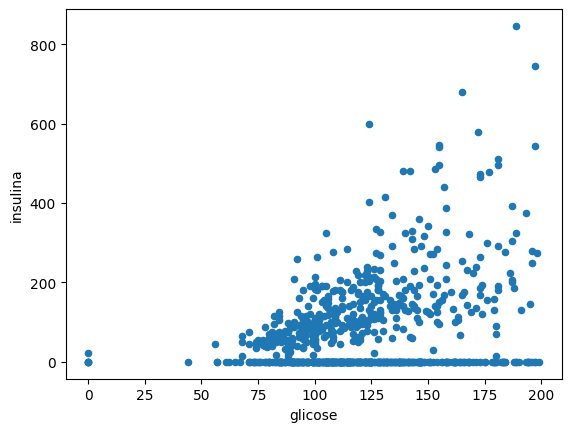

In [20]:
dados.plot.scatter(x="glicose", y="insulina")

In [21]:
from sklearn import *

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = dados[["gestacoes", "glicose", "pressao_arterial", "espessura_pele", "insulina", "imc", "predisposicao_genetica_diabetes", "idade"]]
x

,gestacoes,glicose,pressao_arterial,espessura_pele,insulina,imc,predisposicao_genetica_diabetes,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y = dados["diabetes"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [30]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
modelo_classificador = KNeighborsClassifier(n_neighbors = 5)

In [44]:
modelo_classificador.fit(x_treino, y_treino)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
teste_valores = pd.DataFrame([[1,85,66,29,0,26.6,0.351,31]], columns=x_treino.columns)
modelo_classificador.predict(teste_valores)

array([0])

In [48]:
teste_valores = pd.DataFrame([[6,148,72,35,0,33.6,0.627,50]], columns=x_treino.columns)
modelo_classificador.predict(teste_valores)

array([1])

In [62]:
y_predicoes = modelo_classificador.predict(x_teste)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_true = y_teste, y_pred = y_predicoes)

0.6688311688311688

In [65]:
import seaborn as sb

<Axes: xlabel='glicose', ylabel='Count'>

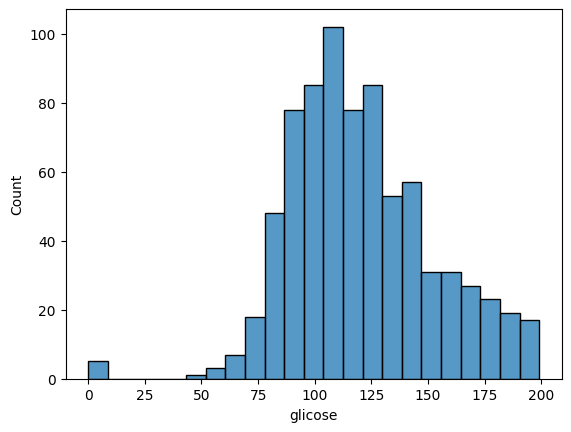

In [69]:
sb.histplot(data = dados, x = "glicose")

<Axes: xlabel='insulina', ylabel='Count'>

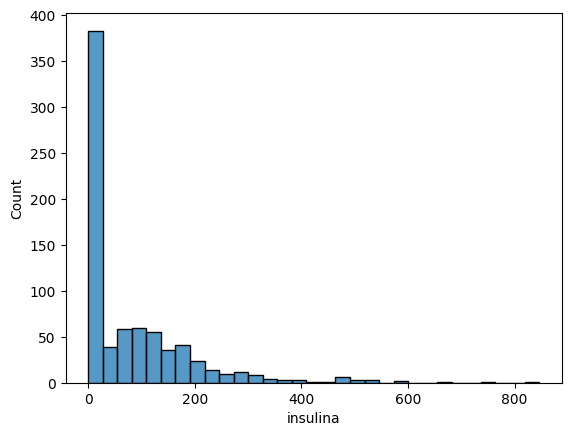

In [70]:
sb.histplot(data = dados, x = "insulina")

<Axes: xlabel='idade', ylabel='Count'>

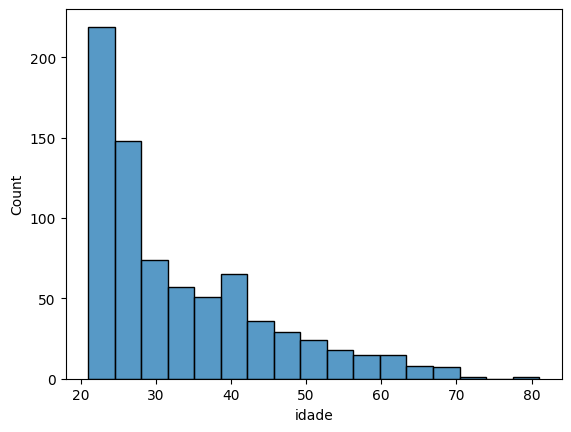

In [71]:
sb.histplot(data = dados, x = "idade")

In [87]:
import matplotlib.pyplot as plt

<Axes: >

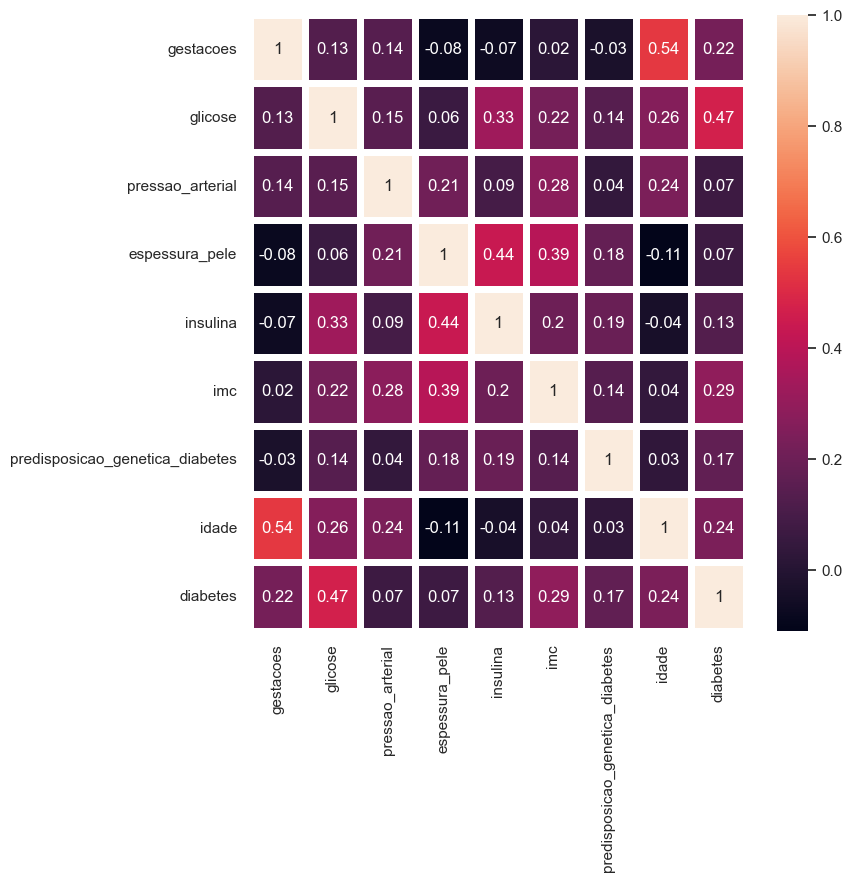

In [88]:
matriz_correlacao = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=matriz_correlacao, annot=True, linewidths=5, ax = ax)

In [81]:
novo_x = dados[["gestacoes", "glicose", "insulina", "imc", "predisposicao_genetica_diabetes","idade"]]
novo_y = dados["diabetes"]

In [83]:
nx_treino, nx_teste, ny_treino, ny_teste = train_test_split(novo_x, novo_y, test_size = 0.2, stratify = novo_y, random_state = 13)

In [85]:
nx_treino.shape

(614, 6)

In [86]:
nx_teste.shape

(154, 6)

In [89]:
import numpy as np

In [90]:
erros = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(nx_treino, ny_treino)
    predicao_i = knn.predict(nx_teste)
    erros.append(np.mean(predicao_i != ny_teste))

Text(0, 0.5, 'Erro médio')

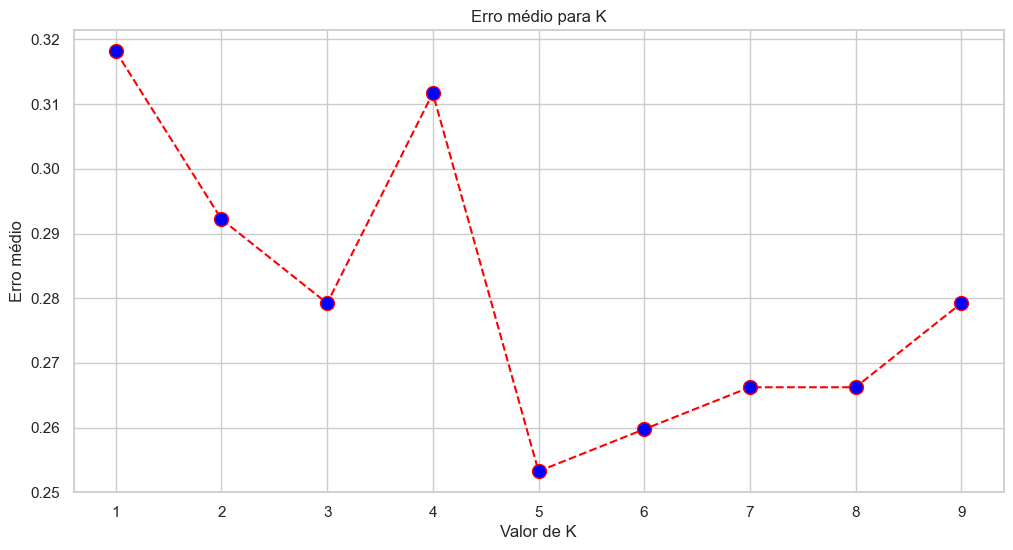

In [91]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), erros, color = "red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize = 10)
plt.title("Erro médio para K")
plt.xlabel("Valor de K")
plt.ylabel("Erro médio")

In [92]:
novo_modelo_classificador = KNeighborsClassifier(n_neighbors = 5)
novo_modelo_classificador.fit(nx_treino, ny_treino)
nova_predicao_y = novo_modelo_classificador.predict(nx_teste)

In [93]:
accuracy_score(y_true = ny_teste, y_pred = nova_predicao_y)

0.7467532467532467

In [94]:
from sklearn.svm import LinearSVC

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
svm = Pipeline(
    [
        ("linear_svc", LinearSVC(C = 1))
    ]
)

In [97]:
svm.fit(nx_treino, ny_treino)

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True


In [98]:
nova_predicao_svn_y = svm.predict(nx_teste)

In [99]:
accuracy_score(y_true = ny_teste, y_pred = nova_predicao_svn_y)

0.7922077922077922

In [101]:
from sklearn.metrics import confusion_matrix

Text(67.25, 0.5, 'Dados Reais')

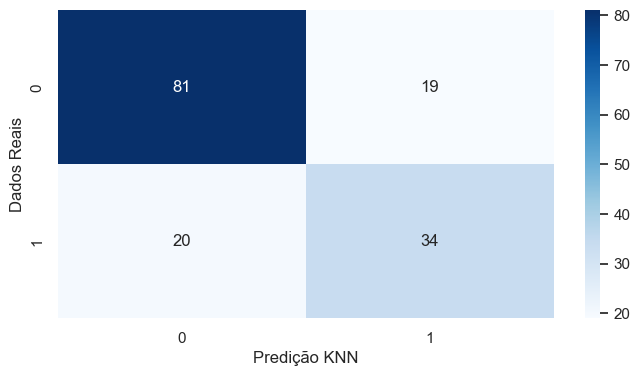

In [104]:
matriz_confusao_knn = confusion_matrix(ny_teste, nova_predicao_y)
plt.figure(figsize = (8,4))
sb.heatmap(matriz_confusao_knn, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predição KNN")
plt.ylabel("Dados Reais")

Text(67.25, 0.5, 'Dados Reais')

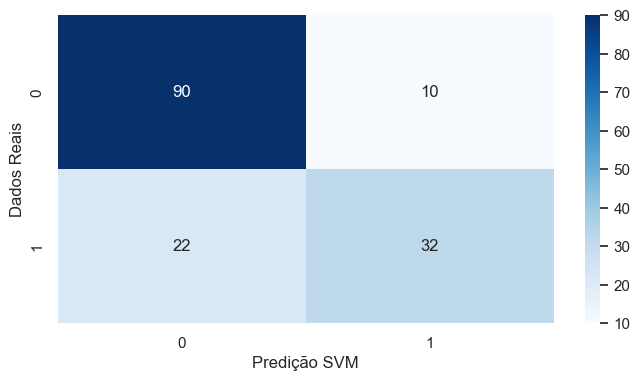

In [105]:
matriz_confusao_svm = confusion_matrix(ny_teste, nova_predicao_svn_y)
plt.figure(figsize = (8,4))
sb.heatmap(matriz_confusao_svm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predição SVM")
plt.ylabel("Dados Reais")

In [106]:
from sklearn.metrics import classification_report

In [107]:
print("Resultado KNN")
print(classification_report(ny_teste, nova_predicao_y))
print("Resultado SVM")
print(classification_report(ny_teste, nova_predicao_svn_y))

Resultado KNN
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Resultado SVM
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [108]:
!pip install shap

                                              0.0/548.0 kB ? eta -:--:--
     -------------------------------        450.6/548.0 kB 9.4 MB/s eta 0:00:01
     -------------------------------------- 548.0/548.0 kB 8.5 MB/s eta 0:00:00
                                              0.0/78.5 kB ? eta -:--:--
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
                                              0.0/2.7 MB ? eta -:--:--
     --------                                 0.6/2.7 MB 12.0 MB/s eta 0:00:01
     ---------------                          1.1/2.7 MB 11.6 MB/s eta 0:00:01
     -----------------------                  1.6/2.7 MB 11.6 MB/s eta 0:00:01
     -------------------------------          2.2/2.7 MB 11.7 MB/s eta 0:00:01
     ---------------------------------------  2.7/2.7 MB 11.6 MB/s eta 0:00:01
     ---------------------------------------- 2.7/2.7 MB 10.3 MB/s eta 0:00:00
                                              0.0/38.1 MB ? eta -:--:--
     


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import shap

In [115]:
explainer = shap.KernelExplainer(novo_modelo_classificador.predict_proba, novo_x[:100])

In [112]:
shap_values = explainer.shap_values(nx_teste[:100])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 48.65it/s]


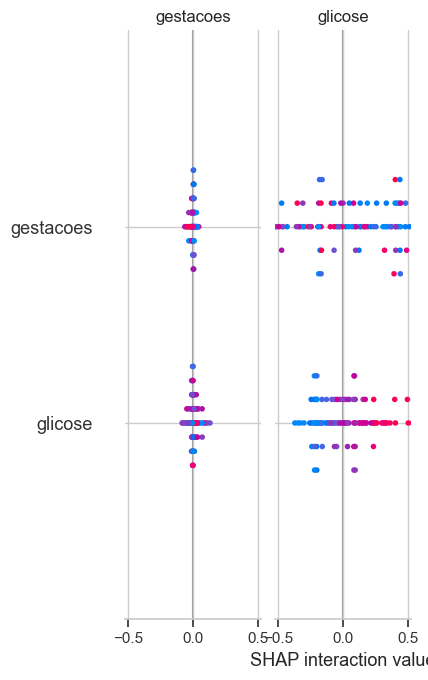

In [120]:
shap.summary_plot(shap_values[:], nx_teste[:100], feature_names=nx_treino.columns)